In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np

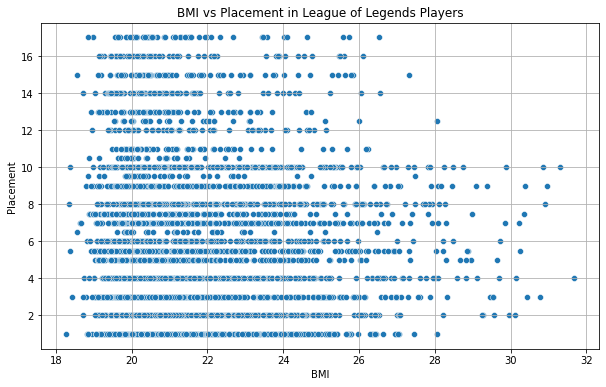

Pearson Correlation Coefficient: -0.0381154816664515
P-value: 0.01552962846509915


In [8]:
#show overall placement for all players and placements
data = pd.read_csv('data.csv')
data = data.dropna(subset=['BMI'])
data = data.dropna(subset=['Placement'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Placement', data=data)
plt.title('BMI vs Placement in League of Legends Players')
plt.xlabel('BMI')
plt.ylabel('Placement')
plt.grid(True)
plt.show()

correlation, p_value = pearsonr(data['BMI'], data['Placement'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

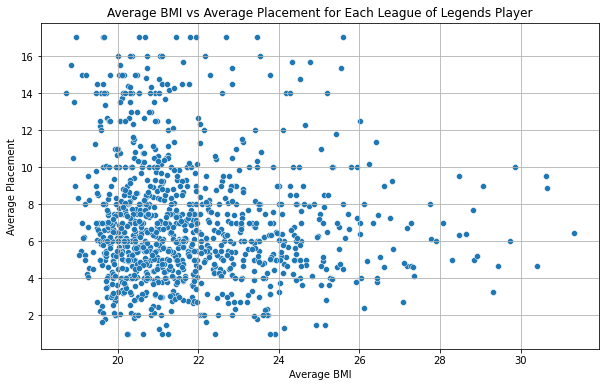

Pearson Correlation Coefficient: -0.07409649071985414
P-value: 0.01592651140487642


In [11]:
#show overall placement for all player averages
data = pd.read_csv('data.csv')
data = data.groupby('Player').agg({'BMI': 'mean', 'Placement': 'mean'}).reset_index()
data = data.dropna(subset=['BMI', 'Placement'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Placement', data=data)
plt.title('Average BMI vs Average Placement for Each League of Legends Player')
plt.xlabel('Average BMI')
plt.ylabel('Average Placement')
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient and the p-value for the averages
correlation, p_value = pearsonr(data['BMI'], data['Placement'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


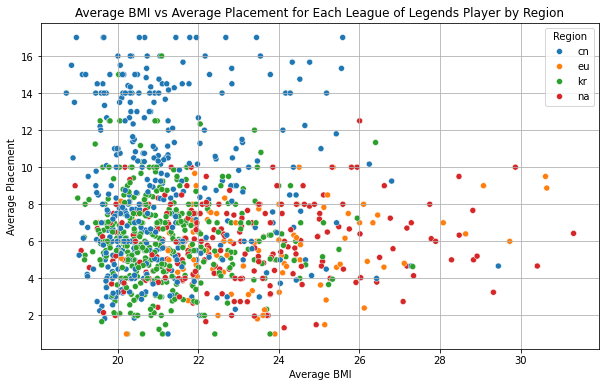

Pearson Correlation Coefficient: -0.07409649071985414
P-value: 0.01592651140487642


In [7]:
#plot performance vs BMI across regions
data = pd.read_csv('data.csv')
grouped_data = data.groupby(['Player', 'region']).agg({'BMI': 'mean', 'Placement': 'mean'}).reset_index()
grouped_data = grouped_data.dropna(subset=['BMI', 'Placement'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Placement', hue='region', data=grouped_data)
plt.title('Average BMI vs Average Placement for Each League of Legends Player by Region')
plt.xlabel('Average BMI')
plt.ylabel('Average Placement')
plt.legend(title='Region')
plt.grid(True)
plt.show()

correlation, p_value = pearsonr(grouped_data['BMI'], grouped_data['Placement'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

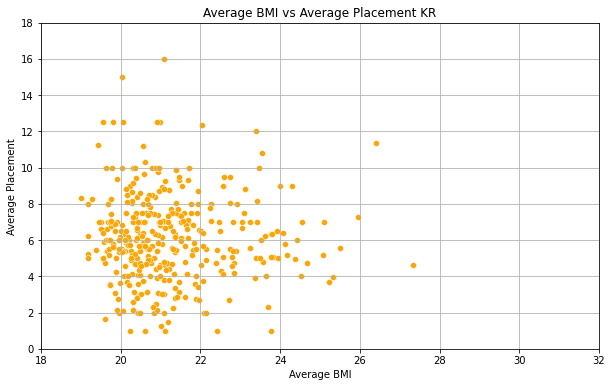

Pearson Correlation Coefficient: -0.023710759410752767
P-value: 0.6502841034883255


In [33]:
#plot each region separately
data = pd.read_csv('data.csv')  # Replace with your actual file path
region_data = data[data['region'] == 'kr']
grouped_data = region_data.groupby('Player').agg({'BMI': 'mean', 'Placement': 'mean'}).reset_index()
grouped_data = grouped_data.dropna(subset=['BMI', 'Placement'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Placement', data=grouped_data, color='orange')
plt.title('Average BMI vs Average Placement KR')
plt.xlabel('Average BMI')
plt.xlim(18, 32)
plt.ylabel('Average Placement')
plt.grid(True)
plt.ylim(0, 18)
plt.show()

correlation, p_value = pearsonr(grouped_data['BMI'], grouped_data['Placement'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


In [32]:
#plot linear regression for bmi vs performance
data = pd.read_csv('data.csv')
data = data[data['region'] == 'na']
data = data.dropna(subset=['BMI', 'Placement'])

X_linear = sm.add_constant(data['BMI'])
y_linear = data['Placement']
linear_model = sm.OLS(y_linear, X_linear)
linear_result = linear_model.fit()
print("Linear Regression Results:")
print(linear_result.summary())

Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:              Placement   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.245
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.134
Time:                        19:36:36   Log-Likelihood:                -2244.8
No. Observations:                 905   AIC:                             4494.
Df Residuals:                     903   BIC:                             4503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983    

In [43]:
#plot logarithmic regression for bm ivs performance
data = pd.read_csv('data.csv')
data = data.dropna(subset=['BMI', 'Placement'])
X_log = sm.add_constant(np.log(data['BMI']))
y = data['Placement']

# Perform logarithmic regression
log_model = sm.OLS(y, X_log)
log_result = log_model.fit()
print("\nLogarithmic Regression Results:")
print(log_result.summary())



Logarithmic Regression Results:
                            OLS Regression Results                            
Dep. Variable:              Placement   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.016
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0142
Time:                        19:49:33   Log-Likelihood:                -11217.
No. Observations:                4030   AIC:                         2.244e+04
Df Residuals:                    4028   BIC:                         2.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.24

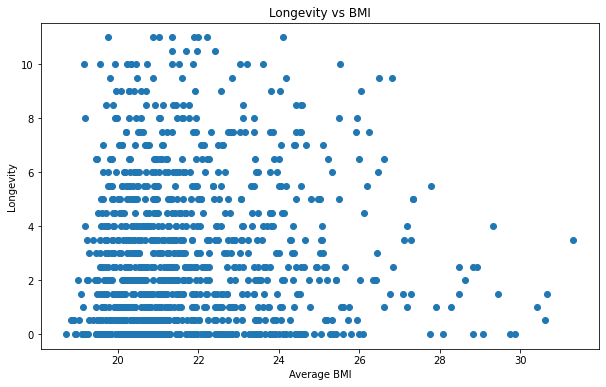

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9044
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.342
Time:                        14:01:46   Log-Likelihood:                -2563.4
No. Observations:                1058   AIC:                             5131.
Df Residuals:                    1056   BIC:                             5141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      2.942      0.061      0.9

In [35]:
#plot and calculate longevity vs bmi

data = pd.read_csv('data.csv') 

# Convert 'Season' to a numeric value
data['Season'] = data['Season'].replace({' spring': '.0', ' summer': '.5'}, regex=True).astype(float)

# Calculate longevity for each player
longevity = data.groupby('Player')['Season'].agg(['min', 'max'])
longevity['Longevity'] = longevity['max'] - longevity['min']

# Calculate average BMI for each player
average_bmi = data.groupby('Player')['BMI'].mean()

# Merge longevity and average BMI
merged_data = pd.merge(longevity, average_bmi, on='Player').reset_index()

# Plot Longevity vs BMI
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['BMI'], merged_data['Longevity'])
plt.title('Longevity vs BMI')
plt.xlabel('Average BMI')
plt.ylabel('Longevity')
plt.show()

# Prepare data for logarithmic regression
merged_data = merged_data[merged_data['BMI'] > 0]  # Filter out non-positive BMI values
X_log = sm.add_constant(np.log(merged_data['BMI']))  # Log-transform BMI
y = merged_data['Longevity']

# Perform logarithmic regression
log_model = sm.OLS(y, X_log)
log_result = log_model.fit()

# Output the summary of the regression
print(log_result.summary())
